# Intro to ScikitLearn

sklearn, is an open-source Python machine learning library.
It's built on top on NumPy (Python library for numerical computing) and Matplotlib (Python library for data visualization).

# Why Scikit-learn??
Although the fields of data science and machine learning are vast, the main goal is finding patterns within data and then using those patterns to make predictions.

And there are certain categories which a majority of problems fall into.

If you're trying to create a machine learning model to predict whether an email is spam and or not spam, you're working on a classification problem (whether something is one thing or another).

If you're trying to create a machine learning model to predict the price of houses given their characteristics, you're working on a regression problem (predicting a number).

If you're trying to get a machine learning algorithm to group together similar samples (that you don't necessarily know which should go together), you're working on a clustering problem.

Once you know what kind of problem you're working on, there are also similar steps you'll take for each. Steps like splitting the data into different sets, one for your machine learning algorithms to learn on (the training set) and another to test them on (the testing set).

Choosing a machine learning model and then evaluating whether or not your model has learned anything.

Scikit-Learn offers Python implementations for doing all of these kinds of tasks (from preparing data to modelling data). Saving you from having to build them from scratch.

# Topics to cover:
1. An end-to-end Scikit-Learn worfklow
2. Getting the data ready
3. Choosing the right maching learning estimator/aglorithm/model for your problem
4. Fitting your chosen machine learning model to data and using it to make a prediction
5. Evaluting a machine learning model
6. Improving predictions through experimentation (hyperparameter tuning)
7. Saving and loading a pretrained model
8. Putting it all together in a pipeline

 # An end to end Scikit-learn workflow

In [10]:
#Getting the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The target column indicates whether the patient has heart disease (target=1) or not (target=0), this is our "label" columnm, the variable we're going to try and predict.

The rest of the columns (often called features) are what we'll be using to predict the target value.

It's a common custom to save features to a varialbe X and labels to a variable y. In practice, we'd like to use the X (features) to build a predictive algorithm to predict the y (labels).

In [12]:
# 1. Getting data ready
# Create X (the features column)
x = heart_disease.drop("target", axis = 1)

# create Y (label)
y = heart_disease["target"]

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
# 2. to choose the right model and hyperparameters
# Since we're working on a classification problem, we'll start with a RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
# make a prediction
import numpy as np
y_label = clf.predict(x_test)
y_label

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [21]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [22]:
clf.score(x_test,y_test) # to know the accuracy of the model

0.8688524590163934

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_label))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [24]:
confusion_matrix(y_test, y_label)

array([[24,  4],
       [ 4, 29]])

In [25]:
accuracy_score(y_test,y_label)

0.8688524590163934

In [31]:
# 5. Improve our model
# try different amount of n_estimators
np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {model.score(x_test, y_test) * 100:.2f}%")
    print("")
    

Trying model with 100 estimators...
Model accuracy on test set: 83.61%

Trying model with 110 estimators...
Model accuracy on test set: 85.25%

Trying model with 120 estimators...
Model accuracy on test set: 86.89%

Trying model with 130 estimators...
Model accuracy on test set: 85.25%

Trying model with 140 estimators...
Model accuracy on test set: 86.89%

Trying model with 150 estimators...
Model accuracy on test set: 85.25%

Trying model with 160 estimators...
Model accuracy on test set: 85.25%

Trying model with 170 estimators...
Model accuracy on test set: 81.97%

Trying model with 180 estimators...
Model accuracy on test set: 85.25%

Trying model with 190 estimators...
Model accuracy on test set: 85.25%



In [35]:
# 6. Save a model and load it
import pickle

# Save an existing model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [37]:
# Load a saved pickle model and evaluate it
loaded_pickle_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
print(f"Loaded pickle model prediction score: {loaded_pickle_model.score(x_test, y_test) * 100:.2f}%")

Loaded pickle model prediction score: 85.25%


# Part1: Getting the data ready

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matlplotlib inline

3 main things to do:
1. Split the data into features and labels (usually X and Y)
2. Fitting the data(also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values(also called feature encoding)

In [38]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]


In [41]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [45]:
x.shape

(303, 13)

In [44]:
len(heart_disease)

303

Important tip
clean data----> transform data -----> reduce data

In [46]:
# we have to make sure that all data is numerical
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [47]:
car_sales.shape

(1000, 5)

In [49]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [50]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [52]:
# split into x and y
x = car_sales.drop("Price",axis = 1)
y = car_sales["Price"]

#split into training and test
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [53]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test, y_test)
# Oops... this doesn't work, we'll have to convert the non-numerical features into numbers first.
#The process of turning categorical features into numbers is often referred to as encoding.

ValueError: could not convert string to float: 'Nissan'

In [59]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["Make", "Colour", "Doors"]

# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged) 

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [60]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [64]:
#refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size = 0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3235867221569877

# What if there were missing values??
1. Fill them with some missing values (also known as imputation)
2. Remove the samples with missing

In [66]:
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [69]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [70]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [71]:
# create x and y
x = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [72]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [73]:
# 1. fill missing data with pandas
car_sales_missing["Make"].fillna("missing", inplace = True)
car_sales_missing["Colour"].fillna("missing",inplace = True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace = True)
car_sales_missing["Doors"].fillna(4, inplace = True)

car_sales_missing.isna().sum()

/var/folders/6v/h1v6vn0d1jq0dpg0btr3dwlm0000gn/T/ipykernel_3963/2958760655.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace = True)
/var/folders/6v/h1v6vn0d1jq0dpg0btr3dwlm0000gn/T/ipykernel_3963/2958760655.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [74]:
car_sales_missing.dropna(inplace = True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [75]:
x = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [76]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["Make", "Colour", "Doors"]

# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged) 

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_x = transformer.fit_transform(x)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [3]:
# Filling missing data with scikit-learn
import pandas as pd

In [6]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [7]:
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [11]:
import pandas as pd
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()
# Split into X and Y
x = car_sales_missing.drop("Price",axis =1)
y = car_sales_missing["Price"]
# Split data into train and test
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [7]:
from sklearn.impute import SimpleImputer

# Create categorical variable imputer
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# Create Door column imputer
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

# Create Odometer (KM) column imputer
num_imputer = SimpleImputer(strategy="mean")

In [4]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

In [15]:
from sklearn.compose import ColumnTransformer

# Create series of column transforms to perform
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])
# Get our transformed data array's back into DataFrame's
filled_x_train_df = pd.DataFrame(filled_x_train, 
                                 columns=["Make", "Colour", "Doors", "Odometer (KM)"])

filled_x_test_df = pd.DataFrame(filled_x_test, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
filled_X_train_df.isna().sum()

NameError: name 'filled_x_train' is not defined

# Choosing the right estimator/algorithm for our problems
Some things to remember:
1. Sklearn refers to machine learning models,algorithms as estimators
2. Classification problem - predicting a category(heart disease or not)
   Sometimes youll see clf
3. Regression problem - predicting a number(selling price of a car)
4. Unsupervised problem (data with no labels) - clustering (grouping unlabelled samples with other similar unlabelled samples

Ig you're working on a machine learning problem and looking to use sklean and not sure what model you should use, use this map
link: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

toy datasets: https://scikit-learn.org/stable/datasets/toy_dataset.html


# 2.1 Picking a machine learning model for a regression problem

The goal of the California Housing dataset is to predict a given district's median house value (in hundreds of thousands of dollars) on things like the age of the home, the number of rooms, the number of bedrooms, number of people living the home and more.

In [19]:
# get california housing dataset
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedhouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [14]:
import numpy as np
#import algorithm
from sklearn.linear_model import Ridge
#setup random seed
np.random.seed()
#create the data
x = housing_df.drop("target", axis = 1)
y = housing_df["target"] # median house price is $100000

#split the dta into test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.8)

#instantiate and fit the model
model = Ridge()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.6063966006888919

In [16]:
# what if ridge didnt work or the score predicted wasnt that accurate, we can always use a different model

# we can try an ensemble model(an ensemble is combination of smaller models to try and make better better models)

In [20]:
#import the algorithm
from sklearn.ensemble import RandomForestRegressor
np.random.seed()
#create the data
x = housing_df.drop("target", axis = 1)
y = housing_df["target"] # median house price is $100000

#split the dta into test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.8)

#instantiate and fit the model
model = Ridge()
model.fit(x_train,y_train)

model.score(x_test,y_test) # as we can see, it's accuracy is 58.82%, thus the previous method was better

0.5882359256811838

# Picking a machine learning model for a classificaion problem

In [25]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [26]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
# choosing the algorithm
from sklearn.svm import LinearSVC

#setup random seed
import numpy as np
np.random.seed(3)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"];

#split the 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
# Instantiate LinearSVC
clf = LinearSVC(max_iter = 1000)
clf.fit(x_train,y_train);

# Evaluate the linarSVC
clf.score(x_test,y_test) # Predicts 80.3% accuracy

/Users/dipitmadan/Documents/AI_ML_Course/scikit-learn/env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dipitmadan/Documents/AI_ML_Course/scikit-learn/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8032786885245902

In [49]:
# we can also use RandomForestClassifier as the machine learning algorithm

In [51]:
# choosing the algorithm
from sklearn.ensemble import RandomForestClassifier

#setup random seed
import numpy as np
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"];

#split the 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
# Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
# Evaluate the linarSVC
clf.score(x_test,y_test) # has a 85.24% accuracy

0.8524590163934426

Tidbits:
1. If you have structured data, use the ensemble methods etc: data in tabular form
2. If you have unstructured data, use deep learning and transfer learning models eg: images,audio etc

# 3. Fitting the model and using it to make predictions

In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the fit() method and passing it data, such as, fit(X, y).

Where X is a feature array and y is a target array.

Other names for X include:

Data
Feature variables
Features
Other names for y include:

Labels
Target variable
For supervised learning there is usually an X and y.

For unsupervised learning, there's no y (no labels).

# 3.1 Fitting the data to model

In [52]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
import numpy as np
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"];

#split the 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
# Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train) # fitting the training dataset to the model
# Evaluate the linarSVC
clf.score(x_test,y_test)

0.8524590163934426

# 3.2 Making Predictions using a machine learning model
There are 2 ways to predict:
1. predict()
2. predict_proba()

In [53]:
# Using a trained model to make predictions

In [54]:
ans = clf.predict(x_test)
ans

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [57]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [58]:
# compare predictions to truthh labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [59]:
clf.score(x_test,y_test)

0.8524590163934426

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [62]:
# Make predictions with predict_proba
# it returns probabilities for a classification problem

In [63]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# as we can see above, its a 89% chance that perosn doesnt have heartattack and 11% that he does, thus it returns 0

In [64]:
# lets predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [65]:
# predict can also work on regression problems

In [68]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

#create the data
x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

#split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# creating a model instance
model = RandomForestRegressor()

# fitting the model
model.fit(x_train,y_train)

# making predictions
y_preds = model.predict(x_test)

In [69]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [71]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [74]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3270458119670544

In [75]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 4. Evaluating a Machine learning model

There are 3 ways to evaluate Scikit-learn models/estimators:
1. Estimators built in score() method
2. The scoring parameter
3. Problem-specific metric functions

# 4.1 Evaluating  model with score method

In [79]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# create X and Y
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"];

#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train) # fitting the training dataset to the model

# using the score method
clf.score(x_train,y_train) # would give 1.0, meaning 100% since this is the data on which its trained and it knows it
clf.score(x_test,y_test)

0.8524590163934426

In [80]:
# using score method on our regression problem

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# creating x and y
x = housing_df.drop("target", axis =1)
y = housing_df["target"]

# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#creating model instance
model = RandomForestRegressor(n_estimators = 100)

#fit the model
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.8059809073051385

In [81]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [87]:
y_preds = model.predict(x_test[:5]) #predition of prices
print(y_preds)

[0.49058   0.75989   4.9350165 2.55864   2.33461  ]


# 4.2 Evaluating a model using scoring parameter

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#setup random seed
import numpy as np
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"];

#split the 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
# Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train) # fitting the training dataset to the model

#first using the score method
clf.score(x_test,y_test)

0.8524590163934426

In [96]:
cross_val_score(clf,x,y,cv=5) # cross validation

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [97]:
cross_val_score(clf,x,y,cv=5).mean() # more accurate score

0.8182513661202184

# 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

In [103]:
# Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target",axis =1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(clf,x,y,cv=5)
score.mean()

0.8248087431693989

In [105]:
# Area under ROC curve (receiver operating curve)
# ROC curves are a comparison of a model's true positive rate versus a models false postive rate

# True positive = models predicts 1 when truth is 1
# False positive = model predicts 1 when truth is 0
# True negative = model predicts 0 when truth is 0
# False negative = model predicts 0 when truth is 1

In [107]:
from sklearn.metrics import roc_curve
#fit the curve
clf.fit(x_train,y_train)

#make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.9 , 0.1 ],
       [0.5 , 0.5 ],
       [0.39, 0.61],
       [0.92, 0.08],
       [0.27, 0.73],
       [0.12, 0.88],
       [0.43, 0.57],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.56, 0.44]])

In [109]:
y_probs_positive = y_probs[: ,1]
y_probs_positive[:10]

array([0.1 , 0.5 , 0.61, 0.08, 0.73, 0.88, 0.57, 0.06, 0.03, 0.44])

In [112]:
#calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.03448276, 0.06896552, 0.06896552,
       0.06896552, 0.10344828, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.24137931,
       0.24137931, 0.27586207, 0.4137931 , 0.44827586, 0.51724138,
       0.55172414, 0.65517241, 0.68965517, 0.72413793, 0.86206897,
       0.89655172, 0.96551724, 1.        ])

In [1]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 5.5 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.8 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


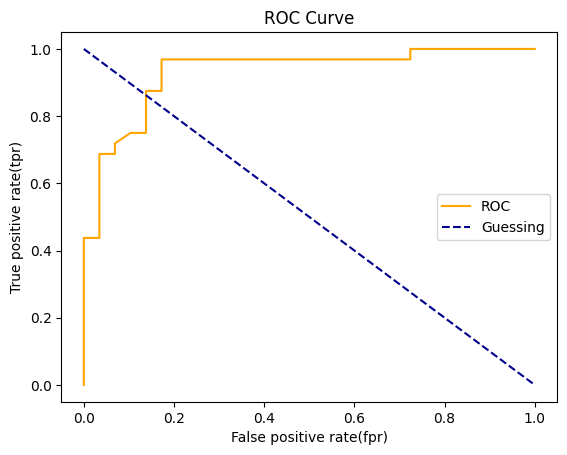

In [8]:
# Create a function for plotting ROC curve

#setup random seed
import numpy as np
import pandas as pd
np.random.seed(42)
heart_disease = pd.read_csv("heart-disease.csv")
# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"];

#split the 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
#fit the curve
clf.fit(x_train,y_train)

#make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]
y_probs_positive = y_probs[: ,1]
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positve rate(tpr) of a model
    """
    # plot roc curve
    plt.plot(fpr,tpr, color = "orange", label = "ROC")
    #plot line with no predictive power(baseline)
    plt.plot([0,1],[1,0], color = "darkblue", linestyle = "--",label = "Guessing")

    # customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [10]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9304956896551724

In [11]:
# Confusion Matrix
# a confusion matrix is  quick way to predict to compare the labels a model prediucts and the actual labels it was supposed to predict In essence gives you an idea of where the model is getting confused

In [13]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]])

In [14]:
pd.crosstab(y_test,y_preds, rownames = ["Actual Labels"],colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [15]:
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.3 MB/s eta 0:00:00a 0:00:01


<Axes: >

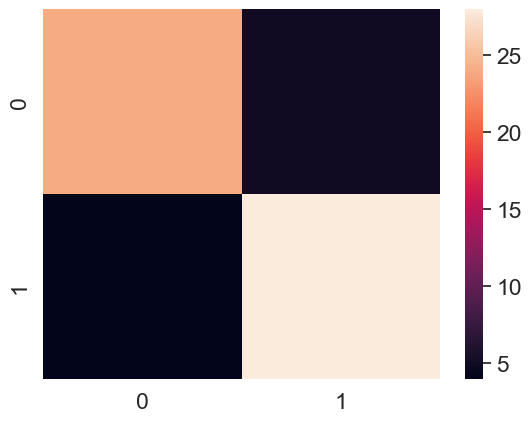

In [16]:
# make our confusion matrix more visual is with Seaborn's heatmap()
import seaborn as sns
# set the font scale
sns.set(font_scale = 1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

#plot it using function
sns.heatmap(conf_mat)

In [3]:
# Classification Report
# A classification report is more so a collection of metrics rather than a single one.

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#setup random seed
import numpy as np
import pandas as pd
np.random.seed(42)
heart_disease = pd.read_csv("heart-disease.csv")
# Make the data
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"];

#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

y_preds= clf.predict(x_test)

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# 4.2.2 Regression Model evaluation metrics
Model Evaluation for regression models is done in many ways. We will cover the following methods in this post:
1. R^2(r-squared) or coefficient of determination
2. Mean absolute error
3. Mean squared Error

In [6]:
# R^2 (coefficient of determination) 
"""
Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.
For example, if all your model does is predict the mean of the targets, its R^2 value would be 0.
And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.
"""
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])

# setting up X and Y
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

model = RandomForestRegressor()
#fitting the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8059809073051385

In [7]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [9]:
y_test.mean()

2.0550030959302323

In [10]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [11]:
r2_score(y_true = y_test, y_pred = y_test_mean)

0.0

In [13]:
r2_score(y_true = y_test, y_pred = y_test)

1.0

In [19]:
# Mean Absolute Error(MAR)
"""
The average of the absolute differences between predictions and actual values. 
It gives you an idea of how wrong your predictions were. Lower is better.
"""
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.3270458119670544

In [28]:
import math
df = pd.DataFrame(data = {"Actual Values":y_test, "Predicted Values": y_preds,  "Difference":abs(y_test-y_preds)})
df

,Actual Values,Predicted Values,Difference
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,0.445390
...,...,...,...
15362,2.63300,2.225000,0.408000
16623,2.66800,1.972540,0.695460
18086,5.00001,4.853989,0.146021
2144,0.72300,0.714910,0.008090


In [32]:
# Mean Squared Error
"""
The average squared differences between predictions and actual values. Squaring the errors removes negative errors.
It also amplifies outliers (samples which have larger errors). Lower is better.
"""
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_preds)
mse

0.2542443610174998

# 4.2.3 Using the scoring parameter

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)

In [37]:
np.random.seed(42)

# cross-validation accuracy
cv_acc = cross_val_score(clf, x,y,cv=5, scoring = None)
cv_acc, cv_acc.mean()

(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]),
 0.8248087431693989)

In [40]:
cv_acc = cross_val_score(clf, x,y, cv=5, scoring="precision")
cv_acc, cv_acc.mean()

(array([0.81081081, 0.90322581, 0.83870968, 0.78787879, 0.76923077]),
 0.8219711703582672)

In [41]:
cv_acc = cross_val_score(clf, x,y, cv=5, scoring="accuracy")
cv_acc, cv_acc.mean()

(array([0.81967213, 0.8852459 , 0.83606557, 0.81666667, 0.76666667]),
 0.8248633879781421)

In [43]:
cv_acc = cross_val_score(clf, x,y, cv=5, scoring="recall")
cv_acc, cv_acc.mean()

(array([0.90909091, 0.87878788, 0.81818182, 0.87878788, 0.87878788]),
 0.8727272727272727)

In [44]:
cv_acc = cross_val_score(clf, x,y, cv=5, scoring="f1") # f1 is a factor based on precision and recall
cv_acc, cv_acc.mean()

(array([0.84507042, 0.89230769, 0.77419355, 0.8       , 0.81690141]),
 0.8256946143361409)

In [45]:
# calculating r2 score and mean absolute error

cv_r2 = cross_val_score(clf,x,y, cv= 5, scoring = "r2")
cv_r2, cv_r2.mean() 

(array([0.33982684, 0.53787879, 0.33982684, 0.12457912, 0.05723906]),
 0.27987012987012994)

In [47]:
cv_mean = cross_val_score(clf, x,y, cv=5, scoring="neg_mean_absolute_error")
cv_mean, cv_acc.mean()

(array([-0.16393443, -0.1147541 , -0.19672131, -0.16666667, -0.25      ]),
 0.8256946143361409)

# 4.2.4 Evaluating a model with scikit-learn functions

In [48]:
# the 3rd way to evaluate scikit-learn machine learnign models/estimators is to using the sklearn.metrics

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# create X and Y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
#creating the model
clf = RandomForestClassifier()
#fit the model
clf.fit(x_train,y_train)

# evaluating model using evaluation function
print("Classifier metrics on the test set")
print(f"Accuracy is {accuracy_score(y_test,clf.predict(x_test))}")
print(f"Precision score is {precision_score(y_test,clf.predict(x_test))}")
print(f"Recall score is {recall_score(y_test,clf.predict(x_test))}")
print(f"F1 score is {f1_score(y_test,clf.predict(x_test))}")

Classifier metrics on the test set
Accuracy is 0.6885245901639344
Precision score is 0.7222222222222222
Recall score is 0.7428571428571429
F1 score is 0.7323943661971831


In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# create X and Y
x = housing_df.drop("target",axis=1)
y = housing_df["target"]
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
#creating the model
clf = RandomForestRegressor()
#fit the model
clf.fit(x_train,y_train)

# making predictions
y_preds = model.predict(x_test)

# Evaluate model using evaluation functions
print(f"R2 score is {r2_score(y_test,y_preds)}")
print(f"mean abs error is {mean_absolute_error(y_test,y_preds)}")  
print(f"mean sqr error is {mean_squared_error(y_test,y_preds)}")

R2 score is 0.9468956345134346
mean abs error is 0.15896990239825615
mean sqr error is 0.07255758723562726


# 5. Improving a Machine Learning Model
The first predictions you make with a model are generally referred to as baseline predictions.

It's similar for the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

How?

Experiment, experiment, experiment!

From a data perspective asks:

Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning data into numbers) strategy.

From a model perspective asks:

Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?


Adjusting hyperparameters is usually an experimental process to figure out which are best. As there's no real way of knowing which hyperparameters will be best when starting out.

To get familar with hyparameter tuning, we'll take our RandomForestClassifier and adjust its hyperparameters in 3 ways.

By hand
Randomly with sklearn.model_selection.RandomizedSearchCV
Exhaustively with sklearn.model_selection.GridSearchCV

Parameters = model find these pattersn in data \n
Hyperparameters = settings on a model you can adjust to (potenitially) improve its ability to find patterns

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params() # to get list of hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

3 ways to set hyperparameters:
1. By hand
2. Randomly with sklearn.model_selection.RandomizedSearchCV
3. Exhaustively with sklearn.model_selection.GridSearchCV

# 5.1 Tuning hyperparameters by hand 
Lets make 3 sets, training, validation and test

In [60]:
# we are trying to adjust the following:
"""
1.  max_depth
2. max_features
3. min_samples_leaf
4. min_samples_split
5. n_estimators
"""

'\n1.  max_depth\n2. max_features\n3. min_samples_leaf\n4. min_samples_split\n5. n_estimators\n'

In [66]:
def evaluate_preds(y_true, y_preds):
    # Performs evaluation comparison on y_true labels VS y_preds labels on a classification
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy,2),
        "precision":round(precision,2),
        "recall": round(precision,2),
        "f1": round(f1,2)
    }
    return metric_dict

In [62]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split the data into X and Y
x = heart_disease_shuffled.drop("target", axis =1)
y = heart_disease_shuffled["target"]

# Split the data into train,validation and test sets
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% of the data

x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test, y_test = x[valid_split:],y[:valid_split]

len(x_train), len(x_valid), len(x_test)

clf.fit(x_train,y_train)
# make predictions
y_preds = clf.predict(x_valid)

#evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.81, 'f1': 0.85}

In [73]:
np.random.seed(42)

# create a second classifier with different hyperparameters
clf2 = RandomForestClassifier(n_estimators = 80, max_depth = 10)
clf2.fit(x_train,y_train)
#making predictions
y_preds_2 = clf2.predict(x_valid)
baseline_metrics_2 = evaluate_preds(y_valid,y_preds)
baseline_metrics_2

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.81, 'f1': 0.85}

# 5.2 Tuning Hyperparameters using RandomizedSearchCV

In [74]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth": [None, 5,10,20,30],
       "max_features": ["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}
np.random.seed(42)

#Split X and Y
heart_disease_shuffled.drop("target",axis = 1)
heart_disease_shuffled["target"]

# Split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
clf = RandomForestClassifier(n_jobs =1)
#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf, param_distributions = grid, n_iter = 10, cv = 5, verbose = 2) # n_iter: number of mdoels to try

# Fit the randomizedSearchCV version of clf
rs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/dipitmadan/Documents/AI_ML_Course/scikit-learn/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dipitmadan/Documents/AI_ML_Course/scikit-learn/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dipitmadan/Documents/AI_ML_Course/scikit-learn/env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/dipitmadan/Documents/AI_ML_Course/sciki

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [76]:
rs_clf.best_params_ # would return the best hyperparameters

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [79]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)
# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.77, 'f1': 0.81}

# 5.3 Tuning Hyperparameters using GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [81]:
grid_2 = {'n_estimators': [100, 200, 500], # we have reduced the search for hyperparameters based on the best_params given by RandomizedSearchCv
         'max_depth': [None],
         'max_features': ['sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [84]:
np.random.seed(42)

#Split X and Y
heart_disease_shuffled.drop("target",axis = 1)
heart_disease_shuffled["target"]

# Split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
clf = RandomForestClassifier(n_jobs =1)
#Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf, param_grid = grid_2,cv = 5, verbose = 2) # n_iter: number of mdoels to try

# Fit the randomizedSearchCV version of clf
rs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/dipitmadan/Documents/AI_ML_Course/scikit-learn/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dipitmadan/Documents/AI_ML_Course/scikit-learn/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dipitmadan/Documents/AI_ML_Course/scikit-learn/env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/dipitmadan/Documents/AI_ML_Course/sciki

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [85]:
gs_metrics = evaluate_preds(y_test, rs_y_preds)
gs_metrics

{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.77, 'f1': 0.81}

In [95]:
gs_clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# 6. Save and Load the model
Two ways to save and load machine learning models:
1. With python's pickle module
2. with the jolib module

In [97]:
# 1. Pickle module
import pickle

# save an exisiting model to file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl", "wb"))

In [103]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

EOFError: Ran out of input

In [102]:
# make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

NameError: name 'loaded_pickle_model' is not defined

In [104]:
# 2. Jolib Module
from joblib import dump,load
# Save model to file
dump(gs_clf,filename = "gs_random_forest_model_1.jolib")

['gs_random_forest_model_1.jolib']

In [106]:
# input a saved joblib model
loaded_job_model = load(filename = "gs_random_forest_model_1.jolib")

In [108]:
# make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.